Found 2338 images belonging to 120 classes.
Found 1034 images belonging to 120 classes.
Epoch 1/30


c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 484s 6s/step - accuracy: 0.0129 - loss: 5.4615 - val_accuracy: 0.0077 - val_loss: 4.7986
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 449s 6s/step - accuracy: 0.0703 - loss: 4.4743 - val_accuracy: 0.0077 - val_loss: 4.8319
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 448s 6s/step - accuracy: 0.1647 - loss: 3.7079 - val_accuracy: 0.0087 - val_loss: 4.8873
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.2920 - loss: 3.0517 - val_accuracy: 0.0087 - val_loss: 4.9581
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.4072 - loss: 2.5720 - val_accuracy: 0.0077 - val_loss: 5.0384
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 442s 6s/step - accuracy: 0.5010 - loss: 2.1315 - val_accuracy: 0.0116 - val_loss: 5.0684
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 446s 6s/step - accuracy: 0.5975 - loss: 1.7981 - val_accuracy: 0.0184 - val_loss: 4.9591
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 444s 6s/step - accuracy: 0.6482 - loss: 1.5897 - val_accuracy: 0.1112 - val_loss: 4.

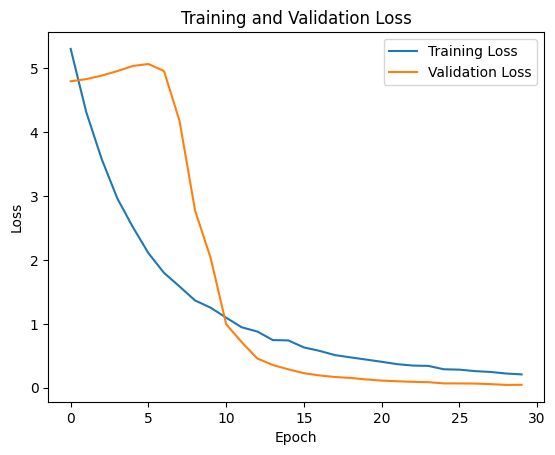

1034/1034 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.9996 - loss: 0.0439
Test Loss: 0.04635943844914436
Test Accuracy: 0.9980657696723938
1034/1034 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step


<Figure size 1500x1500 with 0 Axes>

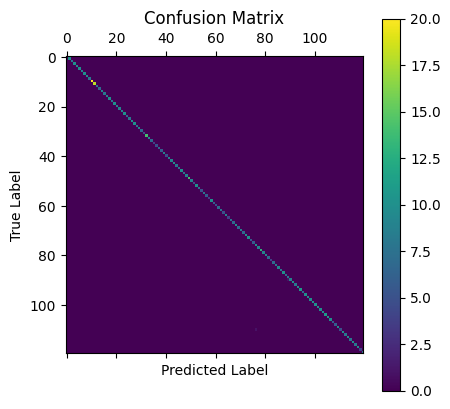

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         9
   

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Define constants
IMG_SIZE = 224
NUM_CLASSES = 120  #120 dog classes
BATCH_SIZE = 32
EPOCHS = 30  # for increasing accuracy increase epochs to 50

# Define paths
TRAIN_DIR = r'C:\Users\adity\OneDrive\Desktop\project_dog\train2'
TEST_DIR = r'C:\Users\adity\OneDrive\Desktop\project_dog\test_small'
WEIGHTS_PATH = r'C:\Users\adity\OneDrive\Desktop\project_dog\efficientnetb0_notop.h5'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Loading and augmenting data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.load_weights(WEIGHTS_PATH)

# Build the model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for test data
test_generator.reset()
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_mat = confusion_matrix(true_labels, y_pred)

# Display confusion matrix
plt.figure(figsize=(15, 15))
plt.matshow(conf_mat, cmap='viridis')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(true_labels, y_pred)
print("Classification Report:\n", class_report)

In [4]:
# Save the model
model.save('dog_breed_classifier.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class index: 81
Predicted class name: otterhound


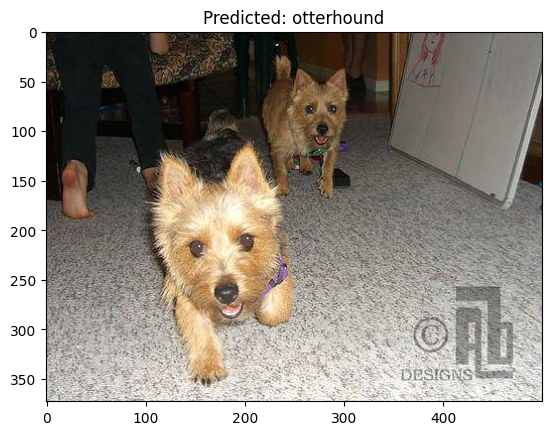

In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('dog_breed_classifier.h5')

# Define class labels
class_labels = {
    0: 'affenpinscher',
    1: 'afghan_hound',
    2: 'african_hunting_dog',
    3: 'airedale',
    4: 'american_staffordshire_terrier',
    5: 'appenzeller',
    6: 'australian_terrier',
    7: 'basenji',
    8: 'basset',
    9: 'beagle',
    10: 'bedlington_terrier',
    11: 'bernese_mountain_dog',
    12: 'black_and_tan_coonhound',
    13: 'blenheim_spaniel',
    14: 'bloodhound',
    15: 'bluetick',
    16: 'border_collie',
    17: 'border_terrier',
    18: 'borzoi',
    19: 'boston_bull',
    20: 'bouvier_des_flandres',
    21: 'boxer',
    22: 'brabancon_griffon',
    23: 'briard',
    24: 'brittany_spaniel',
    25: 'bull_mastiff',
    26: 'cairn',
    27: 'cardigan',
    28: 'chesapeake_bay_retriever',
    29: 'chihuahua',
    30: 'chow',
    31: 'clumber',
    32: 'cocker_spaniel',
    33: 'collie',
    34: 'curly-coated_retriever',
    35: 'dandie_dinmont',
    36: 'dhole',
    37: 'dingo',
    38: 'doberman',
    39: 'english_foxhound',
    40: 'english_setter',
    41: 'english_springer',
    42: 'entlebucher',
    43: 'eskimo_dog',
    44: 'flat_coated_retriever',
    45: 'french_bulldog',
    46: 'german_shepherd',
    47: 'giant_schnauzer',
    48: 'golden_retriever',
    49: 'gordon_setter',
    50: 'great_dane',
    51: 'great_pyrenees',
    52: 'greater_swiss_mountain_dog',
    53: 'groenendael',
    54: 'ibizan_hound',
    55: 'irish_setter',
    56: 'irish_terrier',
    57: 'irish_water_spaniel',
    58: 'irish_wolfhound',
    59: 'italian_greyhound',
    60: 'japanese_spaniel',
    61: 'keeshond',
    62: 'kelpie',
    63: 'kerry_blue_terrier',
    64: 'komondor',
    65: 'kuvasz',
    66: 'labrador_retriever',
    67: 'lakeland_terrier',
    68: 'leonberg',
    69: 'lhasa',
    70: 'malamute',
    71: 'maltese_dog',
    72: 'mexican_hairless',
    73: 'miniature_pinscher',
    74: 'miniature_poodle',
    75: 'miniature_schnauzer',
    76: 'newfoundland',
    77: 'norfolk_terrier',
    78: 'norwegian_elkhound',
    79: 'norwich_terrier',
    80: 'old_english_sheepdog',
    81: 'otterhound',
    82: 'papillon',
    83: 'pekinese',
    84: 'pembroke',
    85: 'pomeranian',
    86: 'pug',
    87: 'redbone',
    88: 'rhodesian_ridgeback',
    89: 'rottweiler',
    90: 'saint_bernard',
    91: 'saluki',
    92: 'samoyed',
    93: 'schipperke',
    94: 'scotch_terrier',
    95: 'scottish_deerhound',
    96: 'sealyham_terrier',
    97: 'shetland_sheepdog',
    98: 'shih_tzu',
    99: 'siberian_husky',
    100: 'silky_terrier',
    101: 'softcoated_wheaten_terrier',
    102: 'staffordshire_bullterrier',
    103: 'standard_poodle',
    104: 'standard_schnauzer',
    105: 'sussex_spaniel',
    106: 'tibetan_mastiff',
    107: 'tibetan_terrier',
    108: 'toy_poodle',
    109: 'toy_terrier',
    110: 'vizsla',
    111: 'walker_hound',
    112: 'weimaraner',
    113: 'welsh_springer_spaniel',
    114: 'west_highland_white_terrier',
    115: 'whippet',
    116: 'wire_haired_fox_terrier',
    117: 'yorkshire_terrier'
}

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load image with target size
    img_array = img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the input shape
    img_array /= 255.0  # Normalize the image
    return img_array

# Function to predict the class of an image
def predict_image_class(image_path):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_labels[predicted_class_index]
    return predicted_class_index, predicted_class_name

image_path = 'C:\\Users\\adity\\OneDrive\\Desktop\\project_dog\\test\\0a01f3b0c6d250c08785716c562e2d4d.jpg'
 
predicted_class_index, predicted_class_name = predict_image_class(image_path)

print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")

# Display the image and predicted class
img = load_img(image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.show()
